In [1]:
# 📦 Data manipulation
import pandas as pd
import numpy as np 

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# 🧪 Model selection & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    classification_report,
    confusion_matrix,
    roc_curve, 
    auc
)
from sklearn.datasets import fetch_openml

In [3]:
#minst = fetch_openml('mnist_784', as_frame = False)
#type is sklearn.utils.Bunch
#The fetch_openml() function is a bit unusual since by default it returns the inputs as
#a Pandas DataFrame and the labels as a Pandas Series (unless the dataset is sparse).
#But the MNIST dataset contains images, and DataFrames aren’t ideal for that, so it’s
#preferable to set as_frame=False to get the data as NumPy arrays instead.

In [4]:
mnist = pd.read_csv(r"E:\hamza\AI\Hands-on-machine-learning-course\chapter 3\mnist_784.csv")


In [5]:
# Convert the entire DataFrame to a NumPy array
X = mnist.drop("class", axis=1).to_numpy()   # shape (70000, 784)
y = mnist["class"].to_numpy()                # shape (70000,)

In [6]:
from sklearn.utils import Bunch
#convert to Bunch
mnist_bunch = Bunch(
    data=X,
    target=y,
    feature_names=[str(i) for i in range(X.shape[1])],
    DESCR="MNIST dataset from CSV"
)


In [7]:
X, y = mnist_bunch.data, mnist_bunch.target

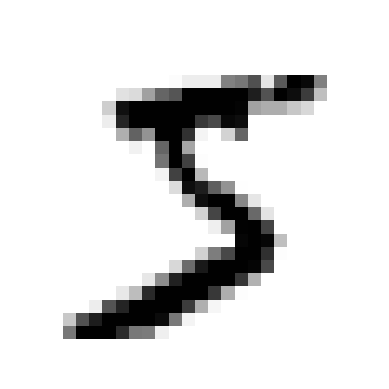

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

### Train test split

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

In [10]:
y_train_5 = (y_train == 5)  #if using minst = fetch_openml('mnist_784', as_frame = False)
                            #then y_train_5 = (y_train == '5') 
                            #(in csv y train is int, in fetch_openml Y_train is str)

                            #transforming the digit classification problem into a yes/no problem → detecting digit 5
y_test_5 = (y_test == 5)    #True (1) → Image is digit 5 , False (0) → Image is not 5 
                            #This is perfect for training a binary classifier (“Is this a 5?”).


In [11]:
print(y_train[:10])      # Look at values
print(y_train.dtype)     # See if it's object (strings) or int

[5 0 4 1 9 2 1 3 1 4]
int64


In [12]:
from sklearn.linear_model import SGDClassifier #stochastic gradient descent (SGD)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

#SGD capable of handling very large datasets efficiently. This is in
#part because SGD deals with training instances independently, one at a time, which
#also makes SGD well suited for online learning

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

### using cross-validation 

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.dummy import DummyClassifier 
#classifies every single image in the most frequent class, which in this case is the negative class (i.e., non 5)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print (any(dummy_clf.predict(X_train))) #any() checks if at least one value in the array is True
                                        #Since the dummy classifier always predicts False (not 5) it will return false
                                        #If somehow the classifier predicted even one True, then any() would return True.
    

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#the accuracy is 90% bucause only about 10% of the image are 5s
#so if fyou guess that an image is not a 5 you will be right about 90% of the time

array([0.90965, 0.90965, 0.90965])

### Confusion matrix

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm
# array ([[TN,FP
#          FN,TP]])

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
y_train_perfect_predictions = y_train_5 #pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

In [ ]:
from sklearn.metrics import precision_score , recall_score

In [21]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 score

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847